In [1]:
from trout.intra.year import Year
from trout.intra.night import Night
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
angles = [15, 16, 18, 19, 20, 20, 21, 22, 23, 24, 25, 26, 27]

In [3]:
def handle_year(year, silent=False):
    results = []
    for n in Year(year).nights:
        if n.is_bad() or not n.has_color_normalized_folder():
            if not silent:
                print(f"Skipping {n} as its a bad night")
            continue
        if n.stats['moon_phase_name'] == 'Full Moon':
            if not silent:
                print(f"Skipping {n} because of full moon")
            continue
        
        if not silent:
            print(f"{n}")

        def handle_angles(angle_status):
            for a in angles:
                data = n.get_sky_bg_refined(
                    cluster_angles_round=[a], 
                    angle_status=angle_status,
                    columns=["Median", "norm_4px_color_1", "Date", "Moon_Phase", "Moon_Distance"])
                data = data[
                    ((data["Moon_Phase"] > 0.95) | (data["Moon_Phase"] < 0.05)) # 5% Moon
                    | (
                        ((data["Moon_Phase"] > 0.90) | (data["Moon_Phase"] < 0.10)) # 10% Moon, dist > 90deg
                        &
                        (data["Moon_Distance"] > 90)
                    )
                    | (
                        ((data["Moon_Phase"] > 0.85) | (data["Moon_Phase"] < 0.15)) # 15% Moon, dist > 110deg
                        &
                        (data["Moon_Distance"] > 110)
                    )
                    | (
                        ((data["Moon_Phase"] > 0.65) | (data["Moon_Phase"] < 0.35)) # 15% Moon, dist > 145deg
                        &
                        (data["Moon_Distance"] > 145)
                    )
                ]
                if len(data) > 0:
                    median_data = data.median()
                    median_sky_bg = median_data["Median"]
                    median_norm_4px_color_1 = median_data["norm_4px_color_1"]
                    median_datetime = median_data["Date"]
                    record = {
                        "median_sky_bg": median_sky_bg,
                        "median_norm_4px_color_1": median_norm_4px_color_1,
                        "angle_status": angle_status,
                        "angle": a,
                        "date": median_datetime,
                        "median_moon_phase": median_data["Moon_Phase"],
                        "median_moon_distance": median_data["Moon_Distance"]
                    }
                    results.append(record)
        handle_angles("INC")
        handle_angles("DEC")

    return results

In [21]:
results = []
for year in range(2012, 2022):
    results += handle_year(year)

Skipping Night: February 11, 2012 as its a bad night
Skipping Night: February 15, 2012 as its a bad night
Night: February 17, 2012
Night: February 18, 2012
Skipping Night: February 21, 2012 as its a bad night
Night: February 24, 2012
Skipping Night: April 05, 2012 as its a bad night
Skipping Night: April 07, 2012 because of full moon
Skipping Night: April 08, 2012 as its a bad night
Night: April 09, 2012
Night: April 16, 2012
Night: April 22, 2012
Night: April 30, 2012
Skipping Night: May 09, 2012 as its a bad night
Night: May 10, 2012
Night: May 12, 2012
Night: May 13, 2012
Night: May 14, 2012
Night: May 15, 2012
Night: May 16, 2012
Night: May 17, 2012
Skipping Night: May 18, 2012 as its a bad night
Night: May 20, 2012
Night: May 21, 2012
Night: May 24, 2012
Skipping Night: May 28, 2012 as its a bad night
Night: June 09, 2012
Night: June 11, 2012
Night: June 16, 2012
Night: June 19, 2012
Night: June 21, 2012
Night: June 24, 2012
Night: June 25, 2012
Night: June 26, 2012
Night: June 27

Night: May 12, 2019
Skipping Night: May 22, 2019 as its a bad night
Night: June 05, 2019
Night: June 06, 2019
Night: June 07, 2019
Night: June 08, 2019
Night: June 12, 2019
Night: June 24, 2019
Night: June 25, 2019
Night: July 07, 2019
Night: July 23, 2019
Night: July 24, 2019
Skipping Night: July 29, 2019 as its a bad night
Night: July 30, 2019
Night: July 31, 2019
Night: August 06, 2019
Night: August 07, 2019
Skipping Night: August 16, 2019 because of full moon
Night: August 18, 2019
Night: August 23, 2019
Night: August 27, 2019
Night: August 28, 2019
Night: August 29, 2019
Night: September 03, 2019
Night: September 04, 2019
Skipping Night: September 15, 2019 because of full moon
Night: September 17, 2019
Night: September 23, 2019
Skipping Night: October 06, 2019 as its a bad night
Night: October 07, 2019
Night: October 08, 2019
Night: February 28, 2020
Night: March 03, 2020
Night: March 05, 2020
Night: March 06, 2020
Skipping Night: March 09, 2020 because of full moon
Night: March 1

In [22]:
df = pd.DataFrame.from_records(results)

In [23]:
df.to_csv("bg_12_21.txt", sep="\t", index=None)

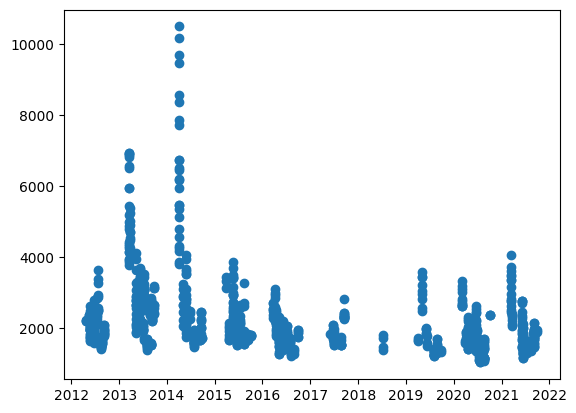

In [24]:
plt.scatter(df["date"], df["median_sky_bg"])